In [ ]:
''' 
8.1.2) The n×n factorization A = LU, where L = (lij) is lower triangular and U = (uij) is
upper triangular, can be computed directly by the following algorithm (provided zero
divisions are not encountered): Specify either l11 or u11 and compute the other such
that l11u11 = a11.
When lii = 1(1 <= i <= n), this procedure is called the Doolittle factorization, and when
ujj = 1 (1 <= j <= n), it is known as the Crout factorization.
A=([5 7 6 5]
   [7 10 8 7]
   [6 8 10 9]
   [5 7 9 10])
Compute and print factorizations.
'''
import pprint
import scipy
import scipy.linalg 
import numpy as np



def LU_decomposition(A):
    """Perform LU decomposition using the Doolittle factorisation."""

    L = np.zeros_like(A)
    U = np.zeros_like(A)
    N = np.size(A, 0)

    for k in range(N):
        L[k, k] = 1
        U[k, k] = (A[k, k] - np.dot(L[k, :k], U[:k, k])) / L[k, k]
        for j in range(k+1, N):
            U[k, j] = (A[k, j] - np.dot(L[k, :k], U[:k, j])) / L[k, k]
        for i in range(k+1, N):
            L[i, k] = (A[i, k] - np.dot(L[i, :k], U[:k, k])) / U[k, k]

    return L, U

A = scipy.array([ [1, 0, 0, 2], [0, 3, 0, 0], [0, 9, 4, 0], [5, 0, 8, 10] ])
print("DOOLITLE")
print(LU_decomposition(A))

def crout(A):

    L = np.zeros((3, 3))
    U = np.zeros((3, 3))

    for k in range(0, 3):
        U[k, k] = 1

        for j in range(k, 3):
            sum0 = sum(L[k, s] * U[s, j] for s in range(1, k-1))
            #reversed
            L[j, k] = A[k, k] - sum0

        for j in range(k, 3):
            sum1 = sum(L[k, s] * U[s, j] for s in range(1, k-1))
            U[k, j] = (A[k, j] - sum1) / L[k, k]

    return L, U

A = scipy.array([ [1, 0, 0, 2], [0, 3, 0, 0], [0, 9, 4, 0], [5, 0, 8, 10] ])
print("CROUT")
print(crout(A))


(array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 3, 1, 0],
       [5, 0, 2, 1]]), array([[1, 0, 0, 2],
       [0, 3, 0, 0],
       [0, 0, 4, 0],
       [0, 0, 0, 0]]))
(array([[1., 0., 0.],
       [1., 3., 0.],
       [1., 3., 4.]]), array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]]))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:61: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead


In [ ]:
'''
8.1.8) Investigate the numerical difficulties in inverting the following matrix:
A = ([−0.0001 5.096 5.101 1.853]
     [0.      3.737 3.740 3.392]
     [0.      0.    0.006 5.254]
     [0.      0.    0.    4.567])
'''

In [ ]:
A = scipy.array([ [-0.0001, 5.096, 5.101, 1.853], [0, 3.737, 3.740, 3.392], [0, 0, 0.006, 5.254], [0, 0, 0, 4.567] ])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  after removing the cwd from sys.path.


Let's find this matrix's determinant. Check if it is equal to zero. If it is equal to zero that means this matrix is not invertible.

In [ ]:
np.linalg.det(A)

-1.0240127399999987e-05

It is very close to zero. Since the values at the diagonals are small values, I will apply partial pivoting.

In [ ]:

A = scipy.array([ [-0.0001, 5.096, 5.101, 1.853], [0, 3.737, 3.740, 3.392], [0, 0, 0.006, 5.254], [0, 0, 0, 4.567] ])
np.linalg.det(A)

def lu_factor(A):
    """
        LU factorization with partial pivorting

        Overwrite A with: 
            U (upper triangular) and (unit Lower triangular) L 
        Return [LU,piv] 
            Where piv is 1d numpy array with row swap indices 
    """
    n = A.shape[0]
    piv = np.arange(0,n)
    for k in range(n-1):

        # piv
        max_row_index = np.argmax(abs(A[k:n,k])) + k
        piv[[k,max_row_index]] = piv[[max_row_index,k]]
        A[[k,max_row_index]] = A[[max_row_index,k]]

        # LU 
        for i in range(k+1,n):          
            A[i,k] = A[i,k]/A[k,k]      
            for j in range(k+1,n):      
                A[i,j] -= A[i,k]*A[k,j] 

    return A,piv

def ufsub(L,b):
    """ Unit row oriented forward substitution """
    for i in range(L.shape[0]): 
        for j in range(i):
            b[i] -= L[i,j]*b[j]
    return b

def bsub(U,y):
    """ Row oriented backward substitution """
    for i in range(U.shape[0]-1,-1,-1): 
        for j in range(i+1, U.shape[1]):
            y[i] -= U[i,j]*y[j]
        y[i] = y[i]/U[i,i]
    return y
LU, piv = lu_factor(A)                      
b = piv
y = ufsub( LU, b )
x = bsub(  LU, y )


In [ ]:
'''
8.2.2) Using the Jacobi, Gauss-Seidel, and SOR (ω = 1.1) iterative methods, write and execute
a computer program to solve the following linear system to four decimal places
(rounded) of accuracy:

A=([ 7   1 −1   2]    x=[x1, x2, x3, x4]T  and b=[3, -5, 4, -3]T
   [ 1   8  0  −2]
   [−1   0  4  −1]
   [ 2  −2 −1   6])
Ax=b
Compare the number of iterations needed in each case. Hint: The exact solution is
x = (1,−1, 1,−1)T 
'''
import numpy as np

def gauss_seidel_solver(A, b, omega, initial_guess, convergence_criteria):
  """
  This is an implementation of the pseduo-code provided in the Wikipedia article.
  Inputs:
    A: nxn numpy matrix
    b: n dimensional numpy vector
    omega: relaxation factor. Gauss-Seidel method is applied when it is set to 1. SOR is obtained when it is set to 0.5
    initial_guess: An initial solution guess for the solver to start with
  Returns:
    phi: solution vector of dimension n
  """
  phi = initial_guess[:]
  residual = np.linalg.norm(np.matmul(A, phi) - b) #Initial residual
  while residual > convergence_criteria:
    for i in range(A.shape[0]):
      sigma = 0
      for j in range(A.shape[1]):
        if j != i:
          sigma += A[i][j] * phi[j]
      phi[i] = (1 - omega) * phi[i] + (omega / A[i][i]) * (b[i] - sigma)
    residual = np.linalg.norm(np.matmul(A, phi) - b)
    print('Residual: {0:10.6g}'.format(residual))
  return phi


residual_convergence = 1e-8
omega = 1 #Relaxation factor

A = np.ones((4, 4))
A[0][0] = 4
A[0][1] = -1
A[0][2] = -6
A[0][3] = 0

A[1][0] = -5
A[1][1] = -4
A[1][2] = 10
A[1][3] = 8

A[2][0] = 0
A[2][1] = 9
A[2][2] = 4
A[2][3] = -2

A[3][0] = 1
A[3][1] = 0
A[3][2] = -7
A[3][3] = 5

b = np.ones(4)
b[0] = 2
b[1] = 21
b[2] = -12
b[3] = -6

initial_guess = np.zeros(4)

phi = gauss_seidel_solver(A, b, omega, initial_guess, residual_convergence)
print("GAUSS SEIDEL OUTPUT")
print(phi)
omega = 0.5
phi = gauss_seidel_solver(A, b, omega, initial_guess, residual_convergence)
print("SOR OUTPUT")
print(phi)

Residual:    215.137
Residual:    1579.48
Residual:    11842.6
Residual:    88769.8
Residual:     665400
Residual: 4.9877e+06
Residual: 3.73868e+07
Residual: 2.80244e+08
Residual: 2.10065e+09
Residual: 1.5746e+10
Residual: 1.18029e+11
Residual: 8.84721e+11
Residual: 6.63169e+12
Residual: 4.97098e+13
Residual: 3.72614e+14
Residual: 2.79304e+15
Residual: 2.0936e+16
Residual: 1.56932e+17
Residual: 1.17633e+18
Residual: 8.81755e+18
Residual: 6.60945e+19
Residual: 4.95431e+20
Residual: 3.71365e+21
Residual: 2.78367e+22
Residual: 2.08658e+23
Residual: 1.56406e+24
Residual: 1.17239e+25
Residual: 8.78798e+25
Residual: 6.58729e+26
Residual: 4.9377e+27
Residual: 3.7012e+28
Residual: 2.77434e+29
Residual: 2.07959e+30
Residual: 1.55882e+31
Residual: 1.16846e+32
Residual: 8.75851e+32
Residual: 6.5652e+33
Residual: 4.92114e+34
Residual: 3.68878e+35
Residual: 2.76504e+36
Residual: 2.07261e+37
Residual: 1.55359e+38
Residual: 1.16454e+39
Residual: 8.72914e+39
Residual: 6.54319e+40
Residual: 4.90464e+41

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in matmul
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in matmul


In [ ]:
'''
8.3.6) (Student research project) Experiment with the QR algorithm and the singular value
decomposition of matrices—for example, using Matlab. Try examples with four types
of equations Ax = b—namely, (a) the system has a unique solution; (b) the system has
many solutions; (c) the system is inconsistent but has a unique least-squares solution;
(d) the system is inconsistent and has many least-squares solutions.
(m by n matrices of sizes 3-4)
You can use available libraries to compute SDV.
'''

import numpy as np
from numpy import array
from scipy.linalg import svd

#a)the system has unique solution

m_list = [[4, 3], [-5, 9]]
A = np.array(m_list)
B = np.array([20, 26])

# Singular-value decomposition
U, s, VT = svd(A)
print(U)
print(s)
print(VT)


In [ ]:
'''
12.2.9) Program the complete polynomial regression algorithm. The output should be αn, βn,
(σ(n))^2 , and cn for 0 <= n <= N, where N is determined by the condition (σ(N))^2
−1 > (σ(N))^2 ≈ (σ(N+1))^2
'''
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
  r2_train = r2_score(Y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
  r2_test = r2_score(Y_test, y_test_predict)
  




In [ ]:
'''
12.3.10)Using mathematical software such as Matlab, Maple, or Mathematica, generate a system
of twenty equations with three unknowns by a random number generator. Form
the pseudo-inverse matrix and verify the properties in Theorem 2.
'''


In [ ]:
'''
12.3.11)(Continuation.) Repeat using Matrix (7).
A =([−85  −55  −115]
    [−35   97  −167]
    [79   56   102]
    [63   57   69]
    [45  −8    97.5])
'''

[-1.   -0.98 -0.96 -0.94 -0.92 -0.9  -0.88 -0.86 -0.84 -0.82 -0.8  -0.78
 -0.76 -0.74 -0.72 -0.7  -0.68 -0.66 -0.64 -0.62 -0.6  -0.58 -0.56 -0.54
 -0.52 -0.5  -0.48 -0.46 -0.44 -0.42 -0.4  -0.38 -0.36 -0.34 -0.32 -0.3
 -0.28 -0.26 -0.24 -0.22 -0.2  -0.18 -0.16 -0.14 -0.12 -0.1  -0.08 -0.06
 -0.04 -0.02  0.    0.02  0.04  0.06  0.08  0.1   0.12  0.14  0.16  0.18
  0.2   0.22  0.24  0.26  0.28  0.3   0.32  0.34  0.36  0.38  0.4   0.42
  0.44  0.46  0.48  0.5   0.52  0.54  0.56  0.58  0.6   0.62  0.64  0.66
  0.68  0.7   0.72  0.74  0.76  0.78  0.8   0.82  0.84  0.86  0.88  0.9
  0.92  0.94  0.96  0.98  1.  ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



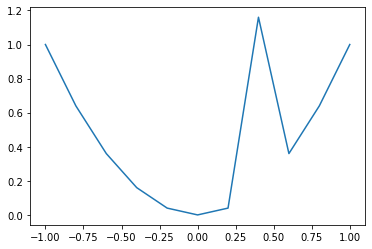

<function matplotlib.pyplot.show>

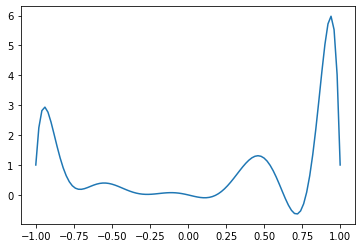

In [ ]:
'''
12.3.12) Write a computer program for carrying out the least squares curve fit using Chebyshev
polynomials. Test the code on a suitable data set and plot the results.
'''

import numpy as np
import json
#import plotly.plotly as py
#from plotly.grid_objs import Grid, Column
#import plotly
import time
import matplotlib.pyplot as plt

# Return Chebysev points in the interval [-1, 1]:
def chebyshev_points(n):
    return np.array([-np.cos((2 * (i + 1) - 1) * np.pi * 0.5 / n) for i in np.arange(n)])

# Perform a least squares fit:
def fit(x, y, order=10):
    # Compute the spline basis:
    A = np.vander(x, order + 1)
    
    # Compute the fit:
    xfit = np.linspace(-1, 1, 101)
    Afit = np.vander(xfit, order + 1)
    fit = np.linalg.lstsq(A, y)[0]
    yfit = np.dot(Afit, fit)
    
    return (xfit, yfit)

# Define a function to sample and fit:
def f(x):
    return x * x

# Order of the spline:
order = 10

# Number of data points
n = 11

# Perturbations:
dys = np.linspace(-1, 1, 21)

# Index of the perturbed point:
dyidx = 7

frames = range(dys.shape[0])
dysteps = range(dys.shape[0])
cheb = chebyshev_points(n)
cols = []
for i in range(dys.shape[0]):
    dy = dys[i]

    # Compute and sample the data:
    x = np.linspace(-1, 1, n)
    y = f(x)
    
    # Perturb a point:
    y[dyidx] += dy
    
    # Compute the chebyshev points and sample the function at them:
    xch = chebyshev_points(n)
    ych = f(xch)
    
    # Perturb a point:
    ych[dyidx] += dy
    
    # Compute the fits:
    (xfit, yfit) = fit(x, y)
    (xchfit, ychfit) = fit(xch, ych)
    
print(xfit)

plt.plot(x, y) 
plt.title("Plot of the Data")
# function to show the plot 
plt.show()

# plot of fitted values
plt.plot(xfit, yfit)
plt.title("Plot of Fitted Values")
plt.show

In [ ]:
'''
10.1.3) Solve the differential equation x' = x with initial value x(0) = 1 by the Taylor series
method on the interval [0, 10]. Compare the result with the exact solution x(t) = e^t.
Use derivatives up to and including the tenth. Use step size h = 1/100.
(experiment  with different orders of the TS method and with different step sizes h)

'''
import numpy as np
import math
# a and b says the interval for the Taylor series, given in the question [0,10]
# h determines step size
# IV: initial values x0 and t0. 
# exact soluntion is x(t)=e^t. Therefore, we get a solution array in the interval [0,10]
# exact solution = [1, e, e^2, e^3, e^4, e^5, e^6, e^7, e^8, e^9]
def taylor_mthd( f, a, b, N, IV ):
 h = (b-a)/float(N) 
 t = np.arange( a, b+h, h ) 
 x = np.zeros((N+1,)) 
 t[0], x[0] = IV 
 for i in range(1,N+1):
     T = 0
     h_factor = h**(i)/(math.factorial(i+1))
     T += h_factor * f( t[i-1], x[i-1] )
     x[i] = x[i-1] + h * T
     return t, x
def f(x,t):
    return x
print(taylor_mthd( f, 0, 10, 20, (0,1) ))

(array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]), array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.]))


In [ ]:
'''
10.2.3) Select one of the following initial-value problems, and compare the numerical solutions
obtained with fourth-order Runge-Kutta formulas and fourth-order Taylor series.
Use different values of h = 2^−n, for n = 2, 3, . . . , 7, to compute the solution on the
interval [1, 2]. (in addition RK-4, RK45 and adaptive RK45 (Fehlberg) method )
a. x' = 1 + x/t              x(1) = 1 
b. x' = 1/x^2 − xt           x(1) = 1
c. x' = 1/t^2 − x/(t − x^2)    x(1) = −1

'''
import numpy as np
import math

#rk4: Runge Kutta4 method and ki's formulas given.
def rk4( f, x0, t ):
    n = len( t )
    x = np.array( [ x0 ] * n )
    for i in range( n - 1 ):
        h = t[i+1] - t[i]
        k1 = h * f( x[i], t[i] )
        k2 = h * f( x[i] + 0.5 * k1, t[i] + 0.5 * h )
        k3 = h * f( x[i] + 0.5 * k2, t[i] + 0.5 * h )
        k4 = h * f( x[i] + k3, t[i+1] )
        x[i+1] = x[i] + ( k1 + 2.0 * ( k2 + k3 ) + k4 ) / 6.0

    return x

def rk45( f, x0, t ):
    #Fourth-order Runge-Kutta method with error estimate.
    #Usage: x, err = rk45(f, x0, t)
    #Inputs f, x0 and t     
    #Outputs x  and err (array containing estimate of errors at each step.)
  

    # Coefficients used to compute the independent variable argument of f

    c20  =   2.500000000000000e-01  #  1/4
    c30  =   3.750000000000000e-01  #  3/8
    c40  =   9.230769230769231e-01  #  12/13
    c50  =   1.000000000000000e+00  #  1
    c60  =   5.000000000000000e-01  #  1/2

    # Coefficients used to compute the dependent variable argument of f

    c21 =   2.500000000000000e-01  #  1/4
    c31 =   9.375000000000000e-02  #  3/32
    c32 =   2.812500000000000e-01  #  9/32
    c41 =   8.793809740555303e-01  #  1932/2197
    c42 =  -3.277196176604461e+00  # -7200/2197
    c43 =   3.320892125625853e+00  #  7296/2197
    c51 =   2.032407407407407e+00  #  439/216
    c52 =  -8.000000000000000e+00  # -8
    c53 =   7.173489278752436e+00  #  3680/513
    c54 =  -2.058966861598441e-01  # -845/4104
    c61 =  -2.962962962962963e-01  # -8/27
    c62 =   2.000000000000000e+00  #  2
    c63 =  -1.381676413255361e+00  # -3544/2565
    c64 =   4.529727095516569e-01  #  1859/4104
    c65 =  -2.750000000000000e-01  # -11/40

    # Coefficients used to compute 4th order RK estimate

    a1  =   1.157407407407407e-01  #  25/216
    a2  =   0.000000000000000e-00  #  0
    a3  =   5.489278752436647e-01  #  1408/2565
    a4  =   5.353313840155945e-01  #  2197/4104
    a5  =  -2.000000000000000e-01  # -1/5

    b1  =   1.185185185185185e-01  #  16.0/135.0
    b2  =   0.000000000000000e-00  #  0
    b3  =   5.189863547758284e-01  #  6656.0/12825.0
    b4  =   5.061314903420167e-01  #  28561.0/56430.0
    b5  =  -1.800000000000000e-01  # -9.0/50.0
    b6  =   3.636363636363636e-02  #  2.0/55.0

    n = len( t )
    x = np.array( [ x0 ] * n )
    e = np.array( [ 0 * x0 ] * n )
    for i in range( n - 1 ):
        h = t[i+1] - t[i]
        k1 = h * f( x[i], t[i] )
        k2 = h * f( x[i] + c21 * k1, t[i] + c20 * h )
        k3 = h * f( x[i] + c31 * k1 + c32 * k2, t[i] + c30 * h )
        k4 = h * f( x[i] + c41 * k1 + c42 * k2 + c43 * k3, t[i] + c40 * h )
        k5 = h * f( x[i] + c51 * k1 + c52 * k2 + c53 * k3 + c54 * k4, t[i] + h )
        k6 = h * f( x[i] + c61 * k1 + c62 * k2 + c63 * k3 + c64 * k4 + c65 * k5, t[i] + c60 * h )
        
        x[i+1] = x[i] + a1 * k1 + a3 * k3 + a4 * k4 + a5 * k5
        x5 = x[i] + b1 * k1 + b3 * k3 + b4 * k4 + b5 * k5 + b6 * k6

        e[i+1] = abs( x5 - x[i+1] )

    return ( x, e )

def rkf( f, a, b, x0, tol, hmax, hmin ):
        
        #Runge-Kutta-Fehlberg method to solve x' = f(x,t) with x(t[0]) = x0.
        #f     - function equal to dx/dt = f(x,t)
        #a     - left-hand endpoint of interval (initial condition is here)
        #b     - right-hand endpoint of interval
        #x0    - initial x value: x0 = x(a)
        #tol   - maximum value of local truncation error estimate
        #hmax(maximum step size), hmin (minimum step size)     

    # Coefficients used to compute the independent variable argument of f

    a2  =   2.500000000000000e-01  #  1/4
    a3  =   3.750000000000000e-01  #  3/8
    a4  =   9.230769230769231e-01  #  12/13
    a5  =   1.000000000000000e+00  #  1
    a6  =   5.000000000000000e-01  #  1/2

    # Coefficients used to compute the dependent variable argument of f

    b21 =   2.500000000000000e-01  #  1/4
    b31 =   9.375000000000000e-02  #  3/32
    b32 =   2.812500000000000e-01  #  9/32
    b41 =   8.793809740555303e-01  #  1932/2197
    b42 =  -3.277196176604461e+00  # -7200/2197
    b43 =   3.320892125625853e+00  #  7296/2197
    b51 =   2.032407407407407e+00  #  439/216
    b52 =  -8.000000000000000e+00  # -8
    b53 =   7.173489278752436e+00  #  3680/513
    b54 =  -2.058966861598441e-01  # -845/4104
    b61 =  -2.962962962962963e-01  # -8/27
    b62 =   2.000000000000000e+00  #  2
    b63 =  -1.381676413255361e+00  # -3544/2565
    b64 =   4.529727095516569e-01  #  1859/4104
    b65 =  -2.750000000000000e-01  # -11/40

    # Coefficients used to compute local truncation error estimate.  These
    # come from subtracting a 4th order RK estimate from a 5th order RK
    # estimate.

    r1  =   2.777777777777778e-03  #  1/360
    r3  =  -2.994152046783626e-02  # -128/4275
    r4  =  -2.919989367357789e-02  # -2197/75240
    r5  =   2.000000000000000e-02  #  1/50
    r6  =   3.636363636363636e-02  #  2/55

    # Coefficients used to compute 4th order RK estimate

    c1  =   1.157407407407407e-01  #  25/216
    c3  =   5.489278752436647e-01  #  1408/2565
    c4  =   5.353313840155945e-01  #  2197/4104
    c5  =  -2.000000000000000e-01  # -1/5

    # Set t and x according to initial condition and assume that h starts
    # with a value that is as large as possible.
  
    t = a
    x = x0
    h = hmax

    # Initialize arrays that will be returned

    T = np.array( [t] )
    X = np.array( [x] )

    while t < b:

        # Adjust step size when we get to last interval

        if t + h > b:
            h = b - t;

        # Compute values needed to compute truncation error estimate and the 4th order RK estimate.

        k1 = h * f( x, t )
        k2 = h * f( x + b21 * k1, t + a2 * h )
        k3 = h * f( x + b31 * k1 + b32 * k2, t + a3 * h )
        k4 = h * f( x + b41 * k1 + b42 * k2 + b43 * k3, t + a4 * h )
        k5 = h * f( x + b51 * k1 + b52 * k2 + b53 * k3 + b54 * k4, t + a5 * h )
        k6 = h * f( x + b61 * k1 + b62 * k2 + b63 * k3 + b64 * k4 + b65 * k5, t + a6 * h )

        # Compute the estimate of the local truncation error.  If it's small enough then we accept this step and save the 4th order estimate.
    
        r = abs( r1 * k1 + r3 * k3 + r4 * k4 + r5 * k5 + r6 * k6 ) / h
        if len( np.shape( r ) ) > 0:
            r = max( r )
        if r <= tol:
            t = t + h
            x = x + c1 * k1 + c3 * k3 + c4 * k4 + c5 * k5
            T = np.append( T, t )
            X = np.append( X, [x], 0 )

        h = h * min( max( 0.84 * ( tol / r )**0.25, 0.1 ), 4.0 )

        if h > hmax:
            h = hmax
        elif h < hmin:
            print( "Step size should be smaller than %e." % hmin )
            break
    return ( T, X )

def taylor_mthd( f, a, b, N, IV ):
 h = (b-a)/float(N) # determine step-size
 t = np.arange( a, b+h, h ) # create mesh
 x = np.zeros((N+1,)) # initialize x
 t[0], x[0] = IV # set initial values
 for i in range(1,N+1):
     T = 0
     h_factor = h**(i)/(math.factorial(i+1))
     T += h_factor * f( t[i-1], x[i-1] )
     x[i] = x[i-1] + h * T
     return t, x
  
def f(x, t):
    return 1 +  x/t
#x(1)=1
print("RungeKutta4")
print(rk4( f, 1, (1,2)))
print("RungeKutta45")
print(rk45( f, 1, (1,2)))
print("AdaptiveRungeKutta45(Fehlberg)")
print(rkf( f, 1, 10, 1, 1/10**8, 1, 1/10**6))
print('Taylor method')
print(taylor_mthd( f, 1, 2, 4, (1,1) ))


RungeKutta4
[1 3]
RungeKutta45
(array([1, 3]), array([0, 0]))
AdaptiveRungeKutta45(Fehlberg)
(array([ 1.        ,  1.03907722,  1.07675163,  1.11583044,  1.15632706,
        1.19829341,  1.24178284,  1.28685062,  1.33355404,  1.38195246,
        1.43210739,  1.48408258,  1.5379441 ,  1.59376041,  1.65160245,
        1.71154373,  1.77366046,  1.83803157,  1.90473889,  1.97386721,
        2.04550439,  2.11974148,  2.19667284,  2.27639626,  2.35901307,
        2.44462827,  2.53335069,  2.6252931 ,  2.72057235,  2.81930955,
        2.9216302 ,  3.02766436,  3.13754679,  3.25141717,  3.36942022,
        3.49170593,  3.61842973,  3.7497527 ,  3.88584174,  4.02686984,
        4.17301624,  4.32446671,  4.48141374,  4.64405682,  4.81260267,
        4.98726552,  5.16826737,  5.3558383 ,  5.55021669,  5.75164963,
        5.96039313,  6.17671252,  6.40088274,  6.63318873,  6.87392576,
        7.12339981,  7.38192797,  7.64983885,  7.92747296,  8.21518319,
        8.51333524,  8.82230806,  9.142494

In [ ]:
'''
11.1.1) Solve the system of differential equations (1) by using two different methods given in
this section and compare the results with the analytic solution.
x'(t) = x(t) − y(t) + 2t − t^2 − t^3
y'(t) = x(t) + y(t) − 4t^2 + t^3
x(0) = 1
y(0) = 0

'''
#In this section, there are Runge kutta4 method and Taylor method.

import numpy as np
import math

def rk4( f, x0, y0, t ):
    n = len( t )
    x = np.array( [ x0 ] * n )
    y = np.array( [ y0 ] * n )
    for i in range( n - 1 ):
        h = t[i+1] - t[i]
        k1 = h * f( x[i], y[i], t[i] )
        k2 = h * f( x[i] + 0.5 * k1, y[i] + 0.5 * k1, t[i] + 0.5 * h )
        k3 = h * f( x[i] + 0.5 * k2, y[i] + 0.5 * k2, t[i] + 0.5 * h )
        k4 = h * f( x[i] + k3, y[i] + k3, t[i+1] )
        x[i+1] = x[i] + ( k1 + 2.0 * ( k2 + k3 ) + k4 ) / 6.0
        y[i+1] = y[i] + ( k1 + 2.0 * ( k2 + k3 ) + k4 ) / 6.0
    return x, y

def taylor_mthd( f, a, b, N, IV ):
 h = (b-a)/float(N) # determine step-size
 t = np.arange( a, b+h, h ) # create mesh
 x = np.zeros((N+1,)) # initialize x
 y = np.zeros((N+1,))
 t[0], x[0] = IV # set initial values
 for i in range(1,N+1):
     T = 0
     h_factor = h**(i)/(math.factorial(i+1))
     T += h_factor * f( t[i-1], y[i-1], x[i-1] )
     x[i] = x[i-1] + h * T
     return t, x, y 




def f(x, y, t):
    return x - y + 2 * t - t ** 2 - t ** 3

def g(x, y, t):
    return x + y - 4 * t ** 2 + t ** 3
print('RungeKutta4')
print(rk4( f, 1, 0, (0,10) ))
print(rk4( g, 1, 0, (0,10) ))

print('Taylor method')
print(taylor_mthd( f, 0, 1, 10, (0,1) ))
print(taylor_mthd( g, 0, 1, 10, (0,1) ))


RungeKutta4
(array([    1, -2722]), array([    0, -2723]))
(array([    1, 15277]), array([    0, 15276]))
Taylor method
(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))
(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), array([1.   , 0.985, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))


In [ ]:
'''
11.2.1) Use RK4 System1 to solve each of the following for 0 <= t <= 1. Use h = 2−k with k = 5,
6, and 7, and compare results.
a)
x'' = 2(e^2t − x^2)^1/2
x(0) = 0 x'(0) = 1
b)
x'' = x^2 − y + e^t
y'' = x − y^2 − e^t
x(0) = 0 x'(0) = 0
y(0) = 1 y'(0) = −2

'''
#In this case,We already have rungekutta4 formulas but we have to apply partial derivatives for runge kutta4.
#Because we reduce the 2nd order ode to 1st order ode. (u=x' and then u'=x'')

def rk4( f, x0, u0, t ):
    n = len( t )
    x = np.array( [ x0 ] * n )
    u = np.array( [ u0 ] * n )
    for i in range( n - 1 ):
        h = t[i+1] - t[i]
        k1 = h * f( x[i], u[i], t[i] )
        k2 = h * f( x[i] + 0.5 * k1, u[i] + 0.5 * k1, t[i] + 0.5 * h )
        k3 = h * f( x[i] + 0.5 * k2, u[i] + 0.5 * k2, t[i] + 0.5 * h )
        k4 = h * f( x[i] + k3, u[i] + k3, t[i+1] )
        x[i+1] = x[i] + ( k1 + 2.0 * ( k2 + k3 ) + k4 ) / 6.0
        u[i+1] = u[i] + ( k1 + 2.0 * ( k2 + k3 ) + k4 ) / 6.0
    return x, u

print('a)')
def f(x, u, t):
    return 2*(np.exp(2*t)-x*2)*(1/2)
print (rk4( f, 0, 1, (0,1) ))

print('b)')
def g(x, y, t):
    return x ** 2 - y + (np.exp(t))

def m(x, y, t):
    return x - y ** 2 - (np.exp(t))

print(rk4( g, 0, 0, (0,1) ))
print(rk4( m, 1, -2, (0,1) ))

a)
(array([0, 1]), array([1, 2]))
b)
(array([0, 1]), array([0, 1]))
(array([    1, -3351]), array([   -2, -3354]))


In [ ]:
'''
14.1.1)The nonlinear two-point boundary-value problem
x'' = e^x
x(0) = α, x(1) = β
has the closed-form solution
x = ln(c1) − 2 ln(cos(1/2c1)^1/2t+c2))
where c1 and c2 are the solutions of
α = ln(c1) − 2lncos(c2)
β = ln(c1) − 2ln(cos(1/2c1)^1/2+c2))

Use the shooting method to solve this problem with α = β = ln 8π2. Start with
z1 = −25/2 and z2 = −23/2 . Determine c1 and c2 so that a comparison with the true
solution can be made. Remark: The corresponding discretization method, as discussed
in the next section, involves a system of nonlinear equations with no closed-form
solution.

'''
import numpy as np

def shooting():
    # alpha and beta are the same
    alpha = np.log(8*(np.pi**2))
    beta = np.log(8*(np.pi**2))
    
    # define exact equation to test 
    def equation(t):
      #according to the given solutions for c1 and c2 and alpha=beta=ln(8*pi^2), then c1=8*n*n*pi^2 and c2=arccos(n).
      #Therefore, for n=1, c1 = 8*pi^2 and c2 = 0.
        c1 = (8*(np.pi**2))
        c2 = 0
      #particular closed form solution x= ln(8*pi^2) − 2ln(cos(2*pi*t)) (alttaki x i böyle yazınca çalışmıyor!!!)
        x = np.log(c1) - 2*np.log(np.cos(t)+c2)
        return x
   

    i = 0
    solution = [ ]
    valset = [ ]
    
    # formula to solve for Z3 - using a, A, b, B for easy way
    def newZ(a, A, b, B):
        VAL = a + (beta - A)*( (a - b) / (A - B) )
        return VAL
    
    # initial Z1 and Z2 given
    Z1 = (-23/2)
    Z2 = (-25/2)
    
    valset.append(Z2)
    valset.append(Z1)
    
    while i < 11:
        VAL = newZ(Z1, equation(Z1), Z2, equation(Z2))
        
        # redefine values for next iteration
        Z2 = Z1
        Z1 = VAL
        
        # move onto next iteration
        i += 1
        
        valset.append(VAL)
        
        # append equation result of new Z into solution set
        solution.append(equation(Z1))
        
    
    print("     Shooting Method Results\n ")
    print("   Z Value                 Solution")
    
    for i in range(0,2):
        print(" ", valset[i], " \t\t", solution[i])
        
    for i in range(2,11):
        print(" ", valset[i], " \t", solution[i])
        
        
    print("\nCompare to actual solution:", alpha)
    
shooting() 


     Shooting Method Results
 
   Z Value                 Solution
  -12.5  		 4.372914686864559
  -11.5  		 4.372570359595937
  -12.503040608228563  	 4.369860935165626
  -12.505816480593161  	 4.369321554793528
  -12.535395328762213  	 4.369053515299309
  -12.545871541650657  	 4.36896063592687
  -12.554033756582248  	 4.368923798271367
  -12.558668539203202  	 4.3689099272479215
  -12.561628799467277  	 4.36890459988181
  -12.563435677065332  	 4.368902569252371
  -12.564557743328548  	 4.368901793000938

Compare to actual solution: 4.368901313378636
